In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../src/pypoint/')))
sys.path.append(os.path.abspath(os.path.join('../src/pypoint/scripts/')))

In [2]:
# import modules
from pypoint import Pypoint
from util import Util
Ut = Util()
Pp = Pypoint()

# import data
pipeline_path = "../src/pypoint/data/pdal.json"
metadata_path = "../data/metadata.json"
save_path = "../data"

In [3]:
coordinates = [
    [-93.805955, 41.911415],
    [-93.800755, 41.912215],
    [-93.800196, 41.909975],
    [-93.802755, 41.907400],
    [-93.806395, 41.907600],
]

In [4]:
polygon2 = Ut.generate_polygon(coordinates, 4326)

In [5]:
Ut.show_on_map(polygon2, 15)

In [6]:
data_df = Pp.fetch_data(coordinates, metadata_path, save_path+"/original.csv", pipeline_path)

Selected Regions: ['IA_FullState/']
Number of loadded points: 126997


In [7]:
geo_df = data_df.loc[0,"data"]

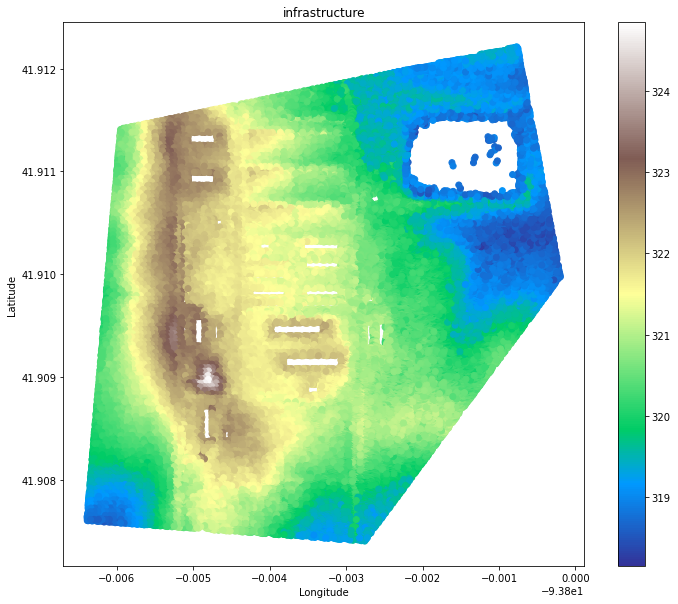

In [9]:
Pp.plot_heatmap(geo_df, "infrastructure", save_path+"/image1.png")

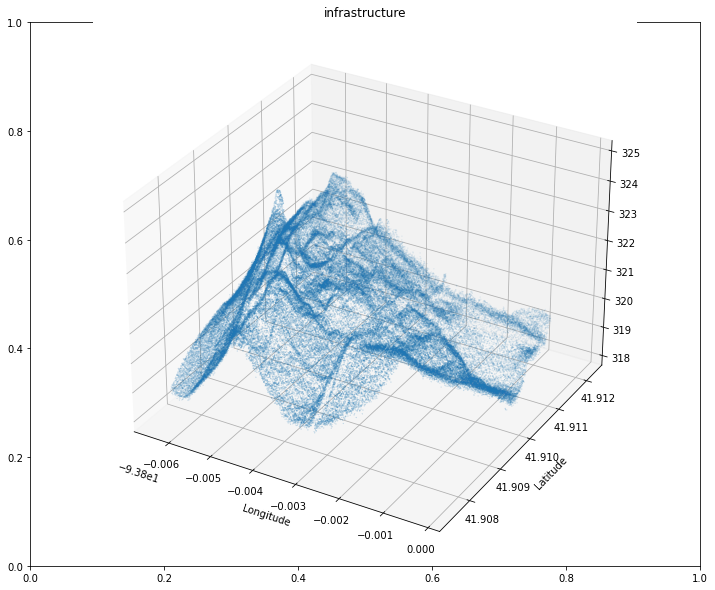

In [11]:
Pp.render_3d(geo_df, "infrastructure", save_path+"/image1_3d.png")

In [10]:
gr_df = Pp.grid_resample(geo_df, 0.001)

In [12]:
gr_df.shape

(6053, 2)

In [14]:
Pp.plot_heatmap(gr_df, "infrastructure", save_path+"/image2.png")

In [15]:
Pp.render_3d(gr_df, "infrastructure", save_path+"/image2_3d.png")

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (rise/run)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.00249159===================== ] (98% - 0.0s - 1 threads)


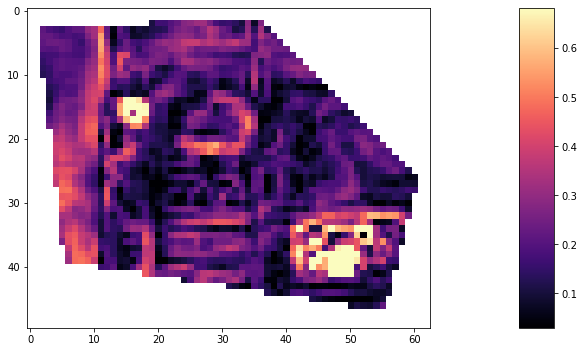

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A O'Callaghan (1984)/Marks (1984) D8/D4 Flow Accumulation
C O'Callaghan, J.F., Mark, D.M., 1984. The Extraction of Drainage Networks from Digital Elevation Data. Computer vision, graphics, and image processing 28, 323--344.

c topology = D8
[==================================================] (100% - 0.0s - 1 threads)
A Generic Flow Accumulation Algorithm
p Creating dependencies array...

d Source cells found = 2056
p Calculating flow accumulation...
t Wall-time       = 0.00478143 s==============] (100% - 0.0s - 1 threads)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
full_df = Pp.calculate_TWI(geo_df, 0.0001, save_slope=save_path+"/slope1.png", save_accum=save_path+"/accum1.png")

In [23]:
full_df.head(100)

elevation                    geometry        TWI
0      319.37  POINT (-93.80231 41.91197)        NaN
1      319.26  POINT (-93.80230 41.91197)        NaN
2      319.25  POINT (-93.80225 41.91196)        NaN
3      319.36  POINT (-93.80237 41.91196)        NaN
4      319.28  POINT (-93.80235 41.91196)        NaN
..        ...                         ...        ...
95     319.30  POINT (-93.80258 41.91169)  10.645626
96     319.63  POINT (-93.80248 41.91167)   6.122714
97     319.71  POINT (-93.80245 41.91166)   6.122714
98     319.60  POINT (-93.80240 41.91165)   6.808904
99     319.48  POINT (-93.80230 41.91164)   7.533783

[100 rows x 3 columns]